In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv', header=None, names=['X','Y','class'])

In [3]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


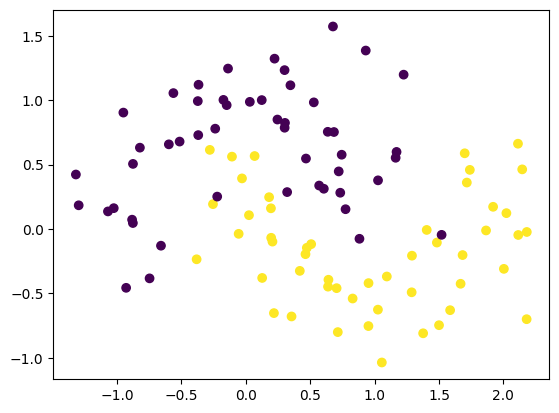

In [4]:
plt.scatter(df['X'], df['Y'], c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
Y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [7]:
model = Sequential()

model.add(Dense(10, activation='sigmoid', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.get_weights()

[array([[ 0.70648855,  0.36678296, -0.51348686, -0.24572   , -0.6002456 ,
          0.12162381,  0.23793668, -0.08618927,  0.5216524 , -0.37106103],
        [-0.53722733,  0.21715271, -0.53210026,  0.20713538, -0.0239175 ,
          0.57302266,  0.4686728 , -0.64289236, -0.6263593 , -0.24317873]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.25712985],
        [ 0.16825914],
        [ 0.02531523],
        [ 0.5655193 ],
        [-0.022497  ],
        [-0.28810266],
        [ 0.6156898 ],
        [-0.149041  ],
        [ 0.37086588],
        [-0.04036683]], dtype=float32),
 array([0.], dtype=float32)]

In [10]:
initial_weights = model.get_weights()

In [11]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [12]:
model.set_weights(initial_weights)

In [13]:
initial_weights

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([0.])]

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X, Y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 324ms/step - accuracy: 0.4758 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4844 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5195 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5234 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4844 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5352 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4805 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss

In [16]:
model.get_weights()

[array([[ 0.45038685,  0.45038685,  0.45038685,  0.45038685,  0.45038685,
          0.45038685,  0.45038685,  0.45038685,  0.45038685,  0.45038685],
        [-0.48751342, -0.48751342, -0.48751342, -0.48751342, -0.48751342,
         -0.48751342, -0.48751342, -0.48751342, -0.48751342, -0.48751342]],
       dtype=float32),
 array([-0.14489259, -0.14489259, -0.14489259, -0.14489259, -0.14489259,
        -0.14489259, -0.14489259, -0.14489259, -0.14489259, -0.14489259],
       dtype=float32),
 array([[0.05680112],
        [0.05680112],
        [0.05680112],
        [0.05680112],
        [0.05680112],
        [0.05680112],
        [0.05680112],
        [0.05680112],
        [0.05680112],
        [0.05680112]], dtype=float32),
 array([-0.05963354], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

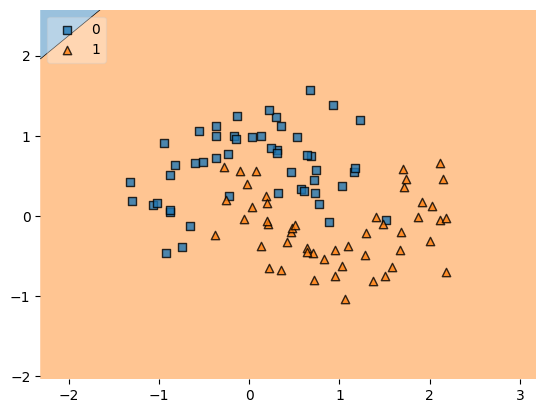

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, Y.astype('int'), clf=model, legend=2)